# Brain Tumor Classification

### Importing Libraries

In [72]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import random
import warnings
from mpl_toolkits.axes_grid1 import ImageGrid

warnings.simplefilter('ignore')

     ---------------------------------------- 44.3/44.3 MB 5.7 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.8.1
    Uninstalling scipy-1.8.1:
      Successfully uninstalled scipy-1.8.1


ERROR: Could not install packages due to an OSError: [WinError 5] Acceso denegado: 'C:\\Users\\PC\\AppData\\Local\\Programs\\Python\\Python39\\Lib\\site-packages\\~-ipy\\.libs\\libansari.54HGNEJBQIYZX5TZPCQGLNVIPFU6NWEX.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 23.1.2 -> 23.3
[notice] To update, run: C:\Users\PC\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip


### Data Preprocesing

In [3]:
glioma = r'C:/Users/PC/Desktop/ML/Data/Brain/data/glioma'
meningioma = r'C:/Users/PC/Desktop/ML/Data/Brain/data/meningioma'
notumor = r'C:/Users/PC/Desktop/ML/Data/Brain/data/notumor'
pituitary = r'C:/Users/PC/Desktop/ML/Data/Brain/data/pituitary'

In [79]:
def cargar_datos(ruta, etiqueta, nuevo_ancho, nuevo_alto):
    datos = []
    etiquetas = []
    for archivo in os.listdir(ruta):
        if archivo.endswith(".jpg"):
            imagen = cv2.imread(os.path.join(ruta, archivo))
            imagen = cv2.resize(imagen, (nuevo_ancho, nuevo_alto))
            datos.append(imagen)
            etiquetas.append(etiqueta)
    return datos, etiquetas

nuevo_ancho = 100
nuevo_alto = 100

datos_notumor, etiquetas_notumor = cargar_datos(notumor, etiqueta=0, nuevo_ancho=nuevo_ancho, nuevo_alto=nuevo_alto)
datos_glioma, etiquetas_glioma = cargar_datos(glioma, etiqueta=1, nuevo_ancho=nuevo_ancho, nuevo_alto=nuevo_alto)
datos_meningioma, etiquetas_meningioma = cargar_datos(meningioma, etiqueta=2, nuevo_ancho=nuevo_ancho, nuevo_alto=nuevo_alto)
datos_pituitary, etiquetas_pituitary = cargar_datos(pituitary, etiqueta=3, nuevo_ancho=nuevo_ancho, nuevo_alto=nuevo_alto)

In [80]:
df = datos_notumor + datos_glioma + datos_meningioma + datos_pituitary
targets = etiquetas_notumor + etiquetas_glioma + etiquetas_meningioma + etiquetas_pituitary

In [81]:
X = np.array(df)
Y = np.array(targets)

print(X.shape, Y.shape)

(1311, 100, 100, 3) (1311,)


### Exploratory Data Analysis

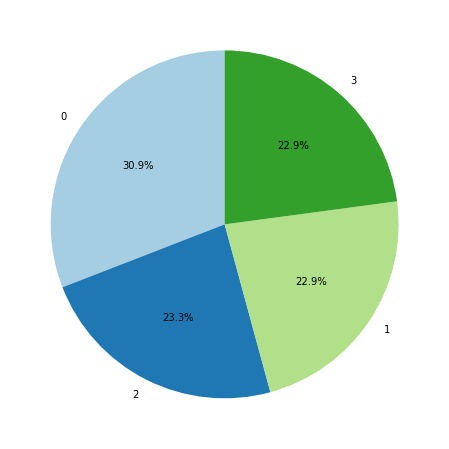

In [85]:
Targets = pd.Series(Y).value_counts()

ct = Targets
plt.figure(figsize = (10,8))
plt.pie(ct, labels=ct.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.show()

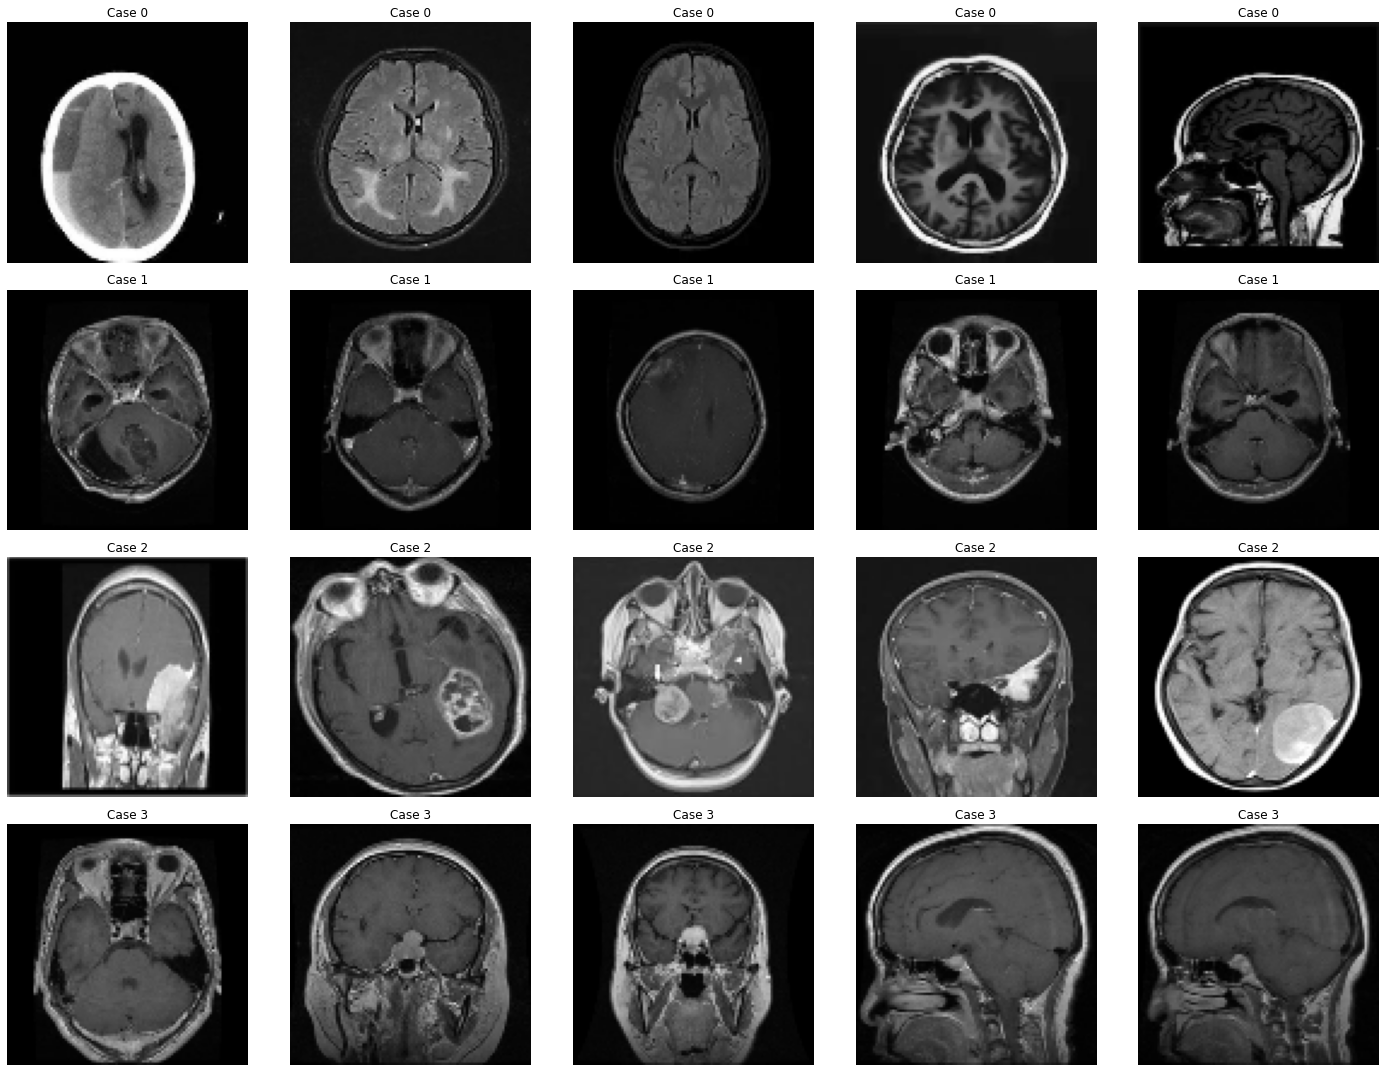

In [87]:
fig, axs = plt.subplots(4, 5, figsize=(20, 15))

for etiqueta in range(5):
    imagenes_etiqueta = [X[i] for i in range(len(Y)) if Y[i] == etiqueta]
    etiquetas_etiqueta = [Y[i] for i in range(len(Y)) if Y[i] == etiqueta]

    for i in range(min(5, len(imagenes_etiqueta))):
        row = etiqueta
        col = i

        axs[row, col].imshow(imagenes_etiqueta[i])
        axs[row, col].set_title(f'Case {etiquetas_etiqueta[i]}')

for ax in axs.flat:
    ax.axis('off')

plt.tight_layout()

plt.show()

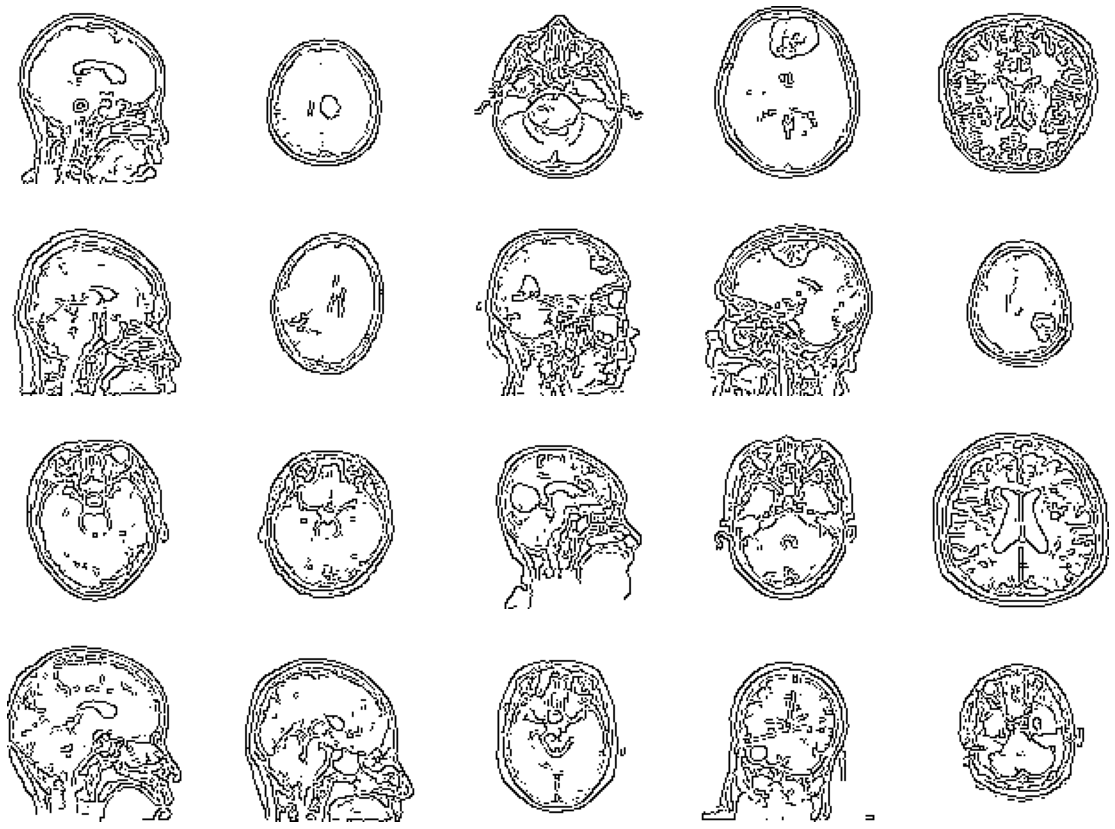

In [52]:
def visualize_images_canny(image_set):
    plt.figure(figsize=(20, 15))
    for i in range(20):
        random_image = random.choice(image_set)

        img_gray = cv2.cvtColor(random_image, cv2.COLOR_BGR2GRAY)
        edges = cv2.Canny(img_gray, 80, 100)

        plt.subplot(4, 5, i+1)
        plt.imshow(edges,  cmap='binary')
        plt.axis('off')
        
    plt.show()
visualize_images_canny(X)   

### Modeling and Evaluation

In [88]:
X = np.array(df)
X = X.reshape(X.shape[0], -1)
Y = targets

In [89]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

### Train Test Split

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

### Logistic Regression

In [91]:
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)
logistic_model.score(X_train, y_train)
model_pred_L = logistic_model.predict(X_test)

print(classification_report(y_test, model_pred_L))
print("accuracy: ",accuracy_score(y_test, model_pred_L))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_pred_L))
print("mean_squared_error: ",mean_squared_error(y_test, model_pred_L))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       128
           1       0.63      0.71      0.67        89
           2       0.56      0.48      0.52        86
           3       0.81      0.88      0.84        91

    accuracy                           0.74       394
   macro avg       0.72      0.72      0.72       394
weighted avg       0.73      0.74      0.73       394

accuracy:  0.7360406091370558
mean_absolute_error:  0.3730964467005076
mean_squared_error:  0.6269035532994924


### Random Forest Classifier

In [92]:
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)
random_forest_model.score(X_train, y_train)
model_pred_R = random_forest_model.predict(X_test)

print(classification_report(y_test, model_pred_R))
print("accuracy: ",accuracy_score(y_test, model_pred_R))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_pred_R))
print("mean_squared_error: ",mean_squared_error(y_test, model_pred_R))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       128
           1       0.82      0.82      0.82        89
           2       0.73      0.63      0.68        86
           3       0.89      0.92      0.91        91

    accuracy                           0.85       394
   macro avg       0.84      0.84      0.84       394
weighted avg       0.85      0.85      0.85       394

accuracy:  0.8527918781725888
mean_absolute_error:  0.20050761421319796
mean_squared_error:  0.30710659898477155


### Decision Tree Classifier

In [93]:
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)
decision_tree_model.score(X_train, y_train)
model_pred_T = decision_tree_model.predict(X_test)

print(classification_report(y_test, model_pred_T))
print("accuracy: ",accuracy_score(y_test, model_pred_T))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_pred_T))
print("mean_squared_error: ",mean_squared_error(y_test, model_pred_T))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       128
           1       0.67      0.66      0.67        89
           2       0.50      0.57      0.53        86
           3       0.83      0.75      0.79        91

    accuracy                           0.71       394
   macro avg       0.71      0.70      0.70       394
weighted avg       0.72      0.71      0.71       394

accuracy:  0.7106598984771574
mean_absolute_error:  0.4213197969543147
mean_squared_error:  0.700507614213198


### KNeighborsClassifier

In [94]:
model_NEG = KNeighborsClassifier(n_neighbors=4)
model_NEG.fit(X_train, y_train)
model_NEG.score(X_train, y_train)
model_NEG_Pred = model_NEG.predict(X_test)

print(classification_report(y_test, model_NEG_Pred))
print("accuracy: ",accuracy_score(y_test, model_NEG_Pred))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_NEG_Pred))
print("mean_squared_error: ",mean_squared_error(y_test, model_NEG_Pred))

              precision    recall  f1-score   support

           0       0.76      0.91      0.83       128
           1       0.62      0.90      0.73        89
           2       0.62      0.09      0.16        86
           3       0.81      0.88      0.84        91

    accuracy                           0.72       394
   macro avg       0.70      0.69      0.64       394
weighted avg       0.71      0.72      0.66       394

accuracy:  0.7208121827411168
mean_absolute_error:  0.42385786802030456
mean_squared_error:  0.748730964467005


### SVC 

In [95]:
model_SVC = SVC(kernel = 'poly' ,random_state = 42)
model_SVC.fit(X_train, y_train)
model_SVC.score(X_train, y_train)
model_SVC_Pred = model_SVC.predict(X_test)

print(classification_report(y_test, model_SVC_Pred))
print("accuracy: ",accuracy_score(y_test, model_SVC_Pred))
print("mean_absolute_error: ",mean_absolute_error(y_test, model_SVC_Pred))
print("mean_squared_error: ",mean_squared_error(y_test, model_SVC_Pred))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85       128
           1       0.66      0.92      0.77        89
           2       0.73      0.43      0.54        86
           3       0.75      0.89      0.81        91

    accuracy                           0.76       394
   macro avg       0.76      0.76      0.74       394
weighted avg       0.78      0.76      0.75       394

accuracy:  0.7639593908629442
mean_absolute_error:  0.3629441624365482
mean_squared_error:  0.6725888324873096


0    128
3     91
1     89
2     86
dtype: int64


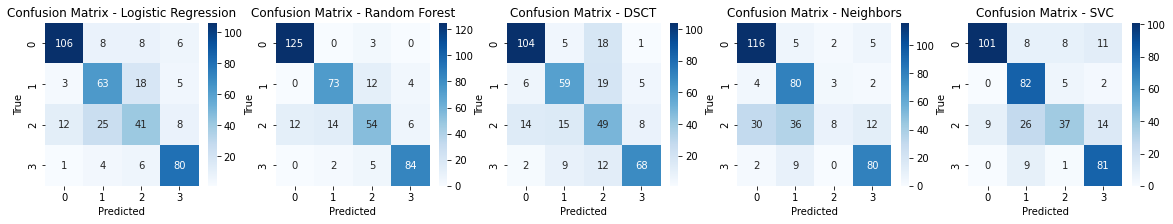

In [96]:
RLOG = confusion_matrix(y_test, model_pred_L)
RMFC = confusion_matrix(y_test, model_pred_R)
DSCT = confusion_matrix(y_test, model_pred_T)
NEG = confusion_matrix(y_test, model_NEG_Pred)
SVC = confusion_matrix(y_test, model_SVC_Pred)

fig, axes = plt.subplots(1, 5, figsize=(20, 3))

sns.heatmap(RLOG, annot=True, cmap='Blues', fmt='g', ax=axes[0])
axes[0].set_title('Confusion Matrix - Logistic Regression')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

sns.heatmap(RMFC, annot=True, cmap='Blues', fmt='g', ax=axes[1])
axes[1].set_title('Confusion Matrix - Random Forest')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

sns.heatmap(DSCT, annot=True, cmap='Blues', fmt='g', ax=axes[2])
axes[2].set_title('Confusion Matrix - DSCT')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('True')


sns.heatmap(NEG, annot=True, cmap='Blues', fmt='g', ax=axes[3])
axes[3].set_title('Confusion Matrix - Neighbors')
axes[3].set_xlabel('Predicted')
axes[3].set_ylabel('True')

sns.heatmap(SVC, annot=True, cmap='Blues', fmt='g', ax=axes[4])
axes[4].set_title('Confusion Matrix - SVC')
axes[4].set_xlabel('Predicted')
axes[4].set_ylabel('True')

values = pd.Series(y_test).value_counts()
print(values)
plt.show()

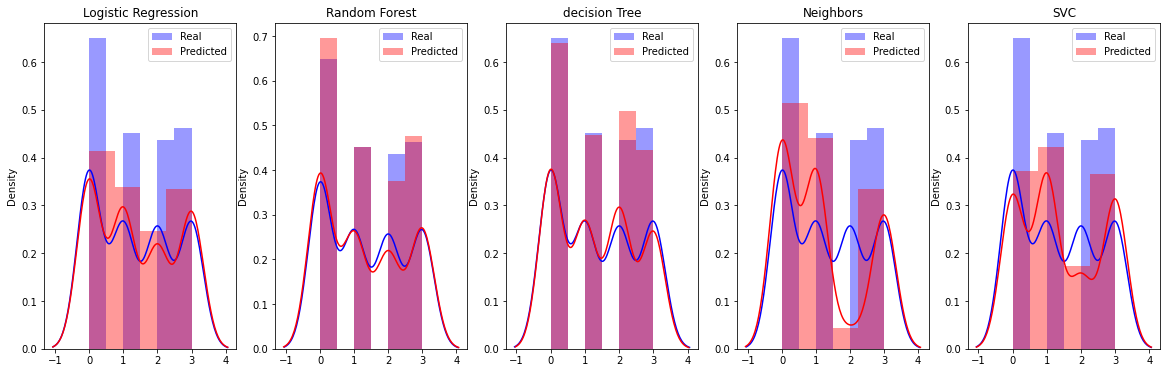

In [97]:
fig, ax = plt.subplots(1, 5, figsize=(20, 6))

sns.distplot(y_test, label='Real', ax=ax[0], color = 'Blue')
sns.distplot(model_pred_L, label='Predicted', ax=ax[0],  color = 'red')

sns.distplot(y_test, label='Real', ax=ax[1], color = 'Blue')
sns.distplot(model_pred_R, label='Predicted', ax=ax[1], color = 'red')

sns.distplot(y_test, label='Real', ax=ax[2], color = 'Blue')
sns.distplot(model_pred_T, label='Predicted', ax=ax[2], color = 'red')

sns.distplot(y_test, label='Real', ax=ax[3], color = 'Blue')
sns.distplot(model_NEG_Pred, label='Predicted', ax=ax[3], color = 'red')

sns.distplot(y_test, label='Real', ax=ax[4], color = 'Blue')
sns.distplot(model_SVC_Pred, label='Predicted', ax=ax[4], color = 'red')


ax[0].set_title('Logistic Regression')
ax[1].set_title('Random Forest')
ax[2].set_title('decision Tree')
ax[3].set_title('Neighbors')
ax[4].set_title('SVC')

ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()
ax[4].legend()

plt.show()